In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

In [11]:
training_data = pd.read_csv('UNSW-NB15_Training_Processed.csv')

In [12]:
testing_data = pd.read_csv('UNSW-NB15_Testing_Processed.csv')

In [13]:
merged_data = pd.concat([training_data, testing_data], axis=0).reset_index(drop=True)

In [14]:
X = merged_data.drop(["label", "attack_cat"], axis=1)
y = merged_data['label'].values

In [15]:
X_train = X.values

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X_scaled,y)

In [18]:
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["Features", "P-Value", "Chi2-Score"]

In [19]:
summary_stats.sort_values(by = "P-Value", ascending=False, inplace=True)

In [20]:
pd.options.display.float_format = '{:.2f}'.format

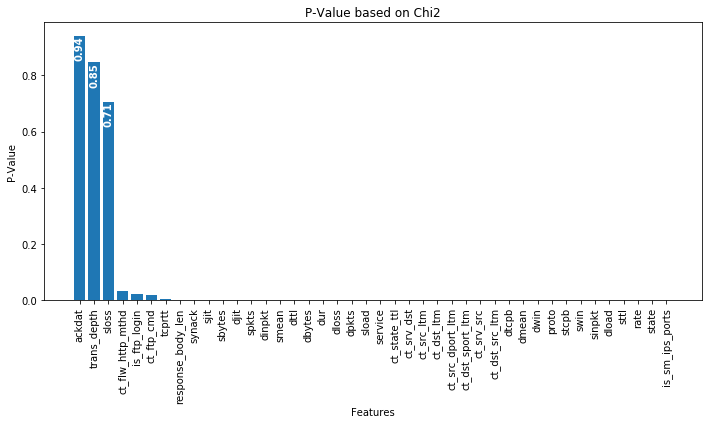

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(summary_stats["Features"], summary_stats["P-Value"])

ax.set_xlabel("Features")
ax.set_ylabel("P-Value")
ax.set_title("P-Value based on Chi2")
ax.tick_params(axis='x', rotation=90)
for index, value in enumerate(summary_stats["P-Value"]):
    if value > 0.05:
        ax.text(index, value, '{:.2f}'.format(value), ha='center', va='top', rotation=90, fontweight='bold', color = 'white')

#plt.grid()
plt.tight_layout()
plt.show()

In [22]:
summary_stats.sort_values(by = "Chi2-Score", ascending=False, inplace=True)

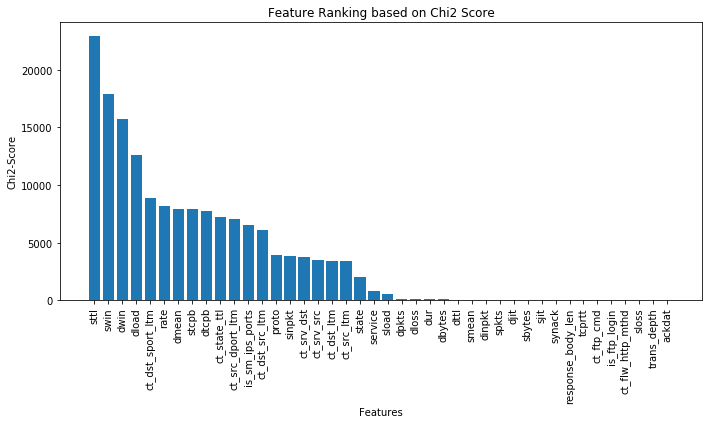

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(summary_stats["Features"], summary_stats["Chi2-Score"])

ax.set_xlabel("Features")
ax.set_ylabel("Chi2-Score")
ax.set_title("Feature Ranking based on Chi2 Score")
ax.tick_params(axis='x', rotation=90)
#for index, value in enumerate(summary_stats["P-Value"]):
#    if value > 0.05:
#        ax.text(index, value, '{:.2f}'.format(value), ha='center', va='top', rotation=90, fontweight='bold', color = 'white')

#plt.grid()
plt.tight_layout()
plt.show()

In [24]:
feature_selector_ANOVA = SelectKBest(f_classif, k = "all")
fit = feature_selector_ANOVA.fit(X_scaled,y)

In [25]:
p_values_ANOVA = pd.DataFrame(fit.pvalues_)
scores_ANOVA = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats_ANOVA = pd.concat([input_variable_names, p_values_ANOVA, scores_ANOVA], axis = 1)
summary_stats_ANOVA.columns = ["Features", "P-Value", "F-Score"]

In [26]:
summary_stats_ANOVA.sort_values(by = "P-Value", ascending=False, inplace=True)

In [27]:
pd.options.display.float_format = '{:.2f}'.format

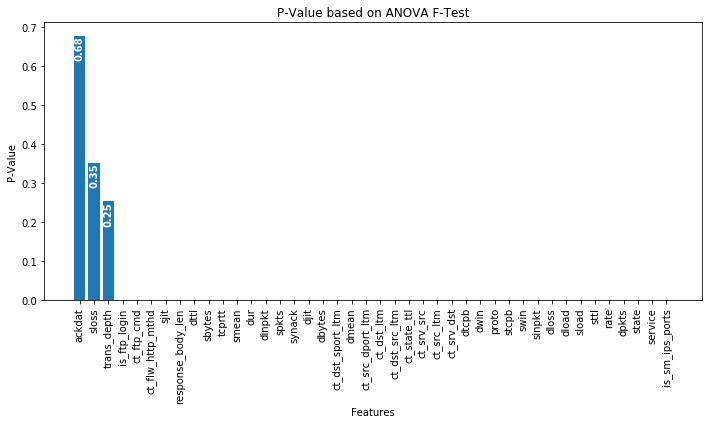

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(summary_stats_ANOVA["Features"], summary_stats_ANOVA["P-Value"])

ax.set_xlabel("Features")
ax.set_ylabel("P-Value")
ax.set_title("P-Value based on ANOVA F-Test")
ax.tick_params(axis='x', rotation=90)

for index, value in enumerate(summary_stats_ANOVA["P-Value"]):
    if value > 0.05:
        ax.text(index, value, '{:.2f}'.format(value), ha='center', va='top', rotation=90, fontweight='bold', color = 'white')

plt.tight_layout()
plt.show()

In [29]:
summary_stats_ANOVA.sort_values(by = "F-Score", ascending=False, inplace=True)

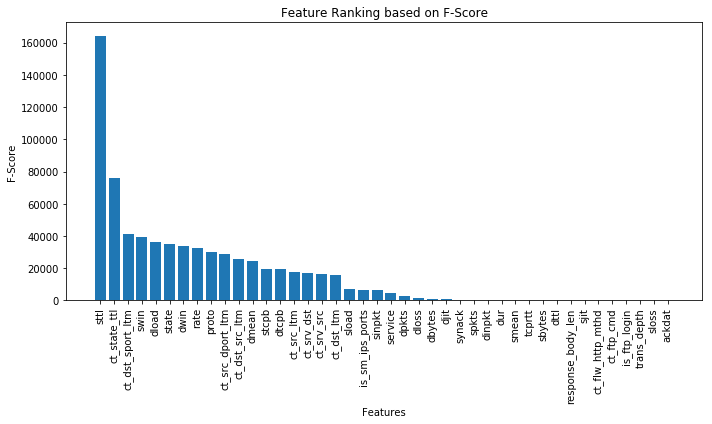

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(summary_stats_ANOVA["Features"], summary_stats_ANOVA["F-Score"])

ax.set_xlabel("Features")
ax.set_ylabel("F-Score")
ax.set_title("Feature Ranking based on F-Score")
ax.tick_params(axis='x', rotation=90)

#for index, value in enumerate(summary_stats_ANOVA["P-Value"]):
#    if value > 0.05:
#        ax.text(index, value, '{:.2f}'.format(value), ha='center', va='top', rotation=90, fontweight='bold', color = 'white')

plt.tight_layout()
plt.show()

In [32]:
#p_value_threshold = 0.05
score_threshold = 0.05

selected_variables_chi2 = summary_stats.loc[(summary_stats["P-Value"] <= score_threshold)]
selected_variables_chi2 = selected_variables_chi2["Features"].tolist()

selected_variables_ANOVA = summary_stats_ANOVA.loc[(summary_stats_ANOVA["P-Value"] <= score_threshold)]
selected_variables_ANOVA = selected_variables_ANOVA["Features"].tolist()

chi2_set = set(selected_variables_chi2)
ANOVA_set = set(selected_variables_ANOVA)

common_features = chi2_set.intersection(ANOVA_set)

unique_to_chi2 = chi2_set - ANOVA_set
unique_to_ANOVA = ANOVA_set - chi2_set

if chi2_set == ANOVA_set:
    print("Yes, both lists contain the same features.")
else:
    print("No, the lists contain different features.")

if unique_to_chi2:
    print("Features unique to chi2:", unique_to_chi2)
if unique_to_ANOVA:
    print("Features unique to ANOVA:", unique_to_ANOVA)

print("Total number of selected features based on Chi2 are {} and Anova F-test are {}".format(len(selected_variables_chi2), len(selected_variables_ANOVA)))

Yes, both lists contain the same features.
Total number of selected features based on Chi2 are 39 and Anova F-test are 39


In [33]:
training_dataset_new = training_data.loc[:, training_data.columns.isin(selected_variables_chi2 + ['attack_cat','label'])]

In [34]:
training_dataset_new.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.12,123041.02,141321.01,117163.99,6,4,258,172,74.09,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.65,123041.02,141321.01,117163.99,14,38,734,42014,78.47,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.62,123041.02,141321.01,117163.99,8,16,364,13186,14.17,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.68,123041.02,4980.00,117163.99,12,12,628,770,13.68,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.45,123041.02,141321.01,117163.99,10,6,534,268,33.37,254,...,1,40,0,0,0,2,39,0,Normal,0


In [37]:
training_dataset_new.to_csv('UNSW_training_P-value.csv', index=False)

In [38]:
testing_dataset_new = testing_data.loc[:, testing_data.columns.isin(selected_variables_chi2 + ['attack_cat','label'])]

In [39]:
testing_dataset_new.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.00,92701.00,141321.01,116438.01,2,0,496,0,90909.09,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.00,92701.00,141321.01,116438.01,2,0,1762,0,125000.00,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.00,92701.00,141321.01,116438.01,2,0,1068,0,200000.01,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.00,92701.00,141321.01,116438.01,2,0,900,0,166666.66,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.00,92701.00,141321.01,116438.01,2,0,2126,0,100000.00,254,...,1,3,0,0,0,2,3,0,Normal,0


In [40]:
testing_dataset_new.to_csv('UNSW_testing_P-value.csv', index=False)